In [147]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;
import random
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

RANDOM_STATE_VALUE = 10

#Loading dataset
cancer = load_breast_cancer()


print(type(cancer))
#create pandas data model
data = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                     columns= list(cancer['feature_names']) + ['target'])
#print(cancer.DESCR)
#print(cancer.keys())
#print(cancer.data[0])


<class 'sklearn.utils.Bunch'>


Wizualizacja danych

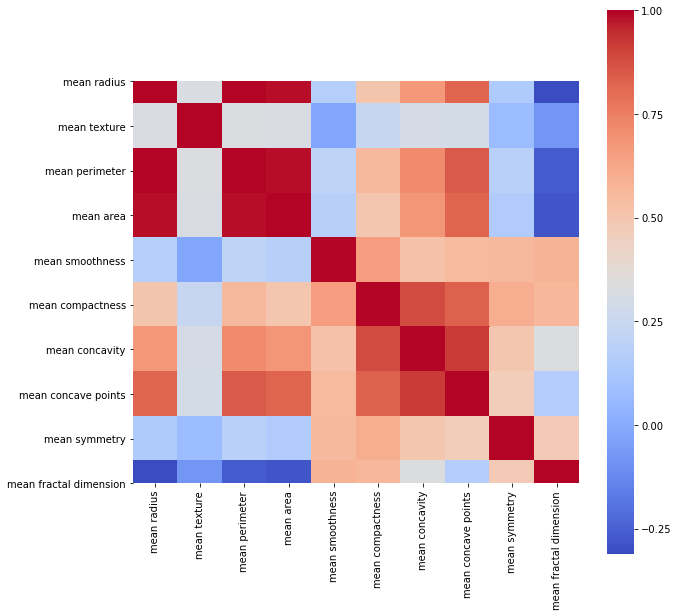

In [148]:
features_mean= list(data.columns[:10])
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=False, square=True, cmap='coolwarm')
plt.show()

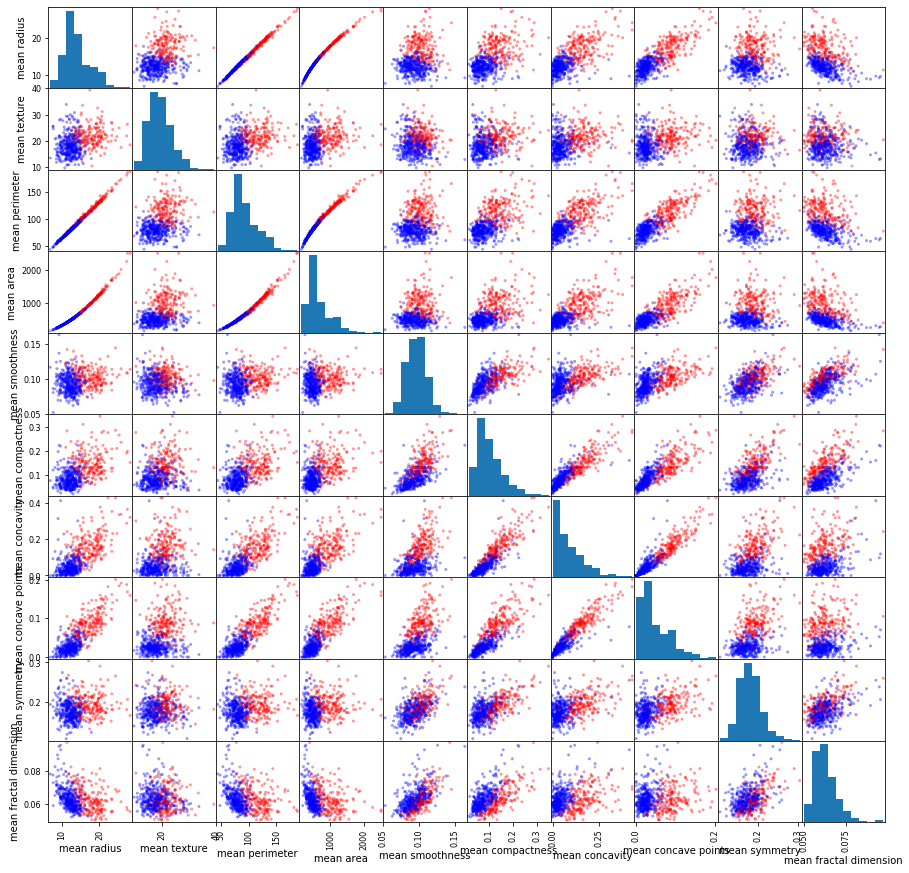

In [149]:
color_dic = {0:'red', 1:'blue'}
colors = data['target'].map(lambda x: color_dic.get(x))

sm = pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

Na tym wykresie widzimy także jakie wartości przyjumją poszczeglne cechy dla raka złośliwego i łagodnego.

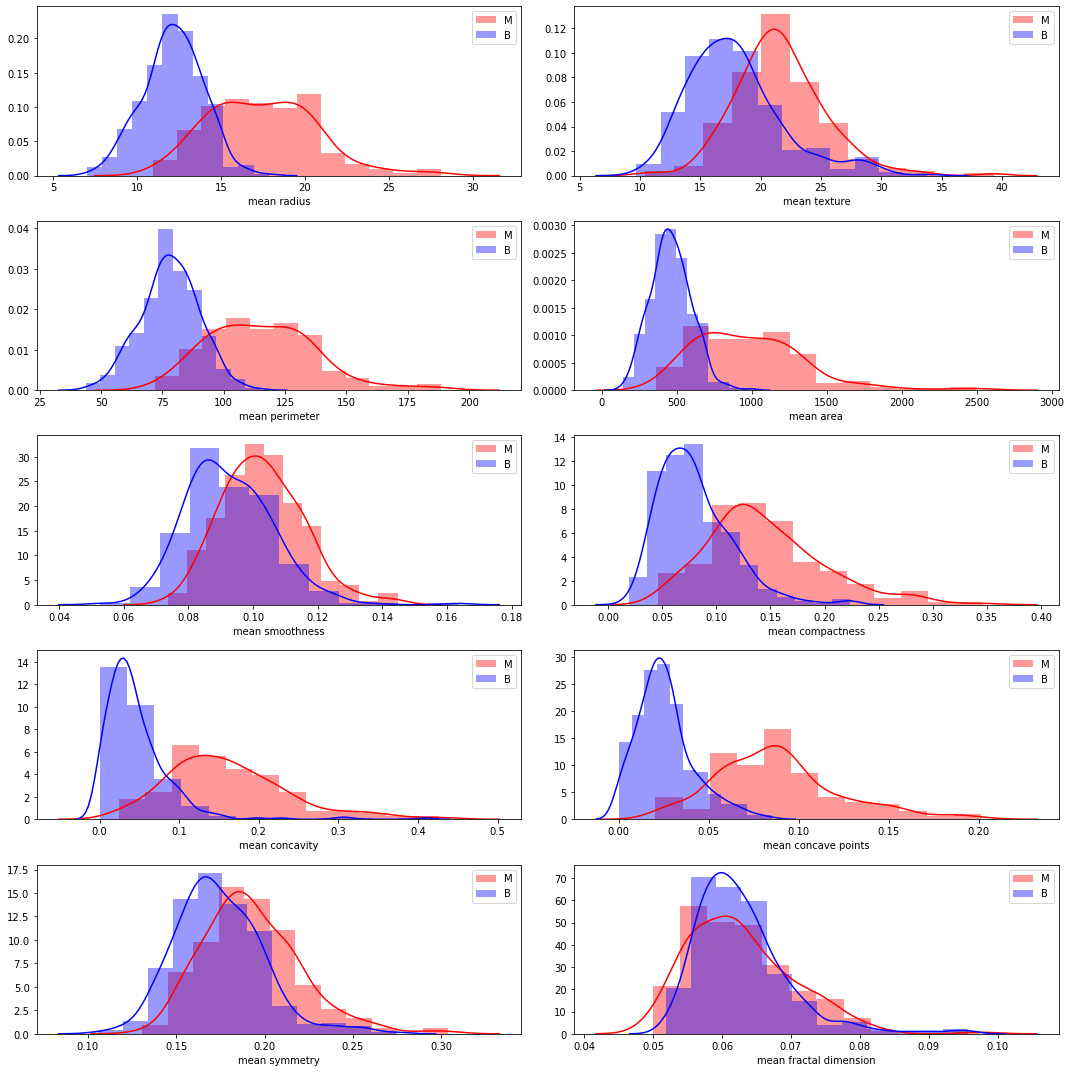

In [150]:
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['target']==0][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['target']==1][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Na powyższych wykresach podobnie jak wcześniej widimy wartosci odpowiednich cech jednach są one w bardziej przystępnej do analizy formie.


Podzielenie danych na część testową i trenującą.

In [151]:
from sklearn.model_selection import train_test_split, cross_val_score
train_data, test_data, \
train_target, test_target = \
train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=RANDOM_STATE_VALUE)

Funkcja oceniająca model

In [152]:
acc_all = []
time_all = []
cvs_all = []
def model_rating(model, test_target, test_data):

    conf_matrix_LR = confusion_matrix(test_target, model.predict(test_data))
    print("Macierz konfuzjii:")
    print(conf_matrix_LR)
    
    acc = accuracy_score(test_target, model.predict(test_data))
    print("Dokładność modelu: {0:0.5f}".format(acc))
    acc_all.append(acc)
    sns.heatmap(conf_matrix_LR)

    id=random.randint(0, test_target.size-1)

    scores = cross_val_score(model, test_data, test_target, cv=5)
    print("Walidacja krzyżowa: {0:.2%} std:(+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    cvs_all.append(np.mean(scores))
    prediction_probability = model.predict_proba(test_data[id,:].reshape(1,-1))

    print("Prawdopodobieństwo predykcji dla losowego pacjenta nr {0}.\nzłośliwy: {1:.5}, łagodny: {2:.5}".format(id, prediction_probability[0][0], prediction_probability[0][1]))


Logistic Regression(logistyczna regresja)

Macierz konfuzjii:
[[37  2]
 [ 5 70]]
Dokładność modelu: 0.93860
Walidacja krzyżowa: 94.78% std:(+/- 8.52%)
Prawdopodobieństwo predykcji dla losowego pacjenta nr 107.
złośliwy: 1.0, łagodny: 1.2744e-23
Czas wywołania: 0.075356s 



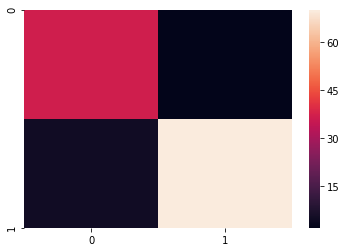

In [153]:
print("Logistic Regression(logistyczna regresja)\n")
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='liblinear',random_state=RANDOM_STATE_VALUE)
start = time.time()
logistic_regression.fit(train_data, train_target)

model_rating(logistic_regression, test_target, test_data)
end = time.time()
time_all.append(end-start)
print("Czas wywołania: %s \n" % "{0:.5}s".format(end-start))

K Nearest Neighbors(K najbliższych sąsiadów)

Macierz konfuzjii:
[[34  5]
 [ 4 71]]
Dokładność modelu: 0.92105
Walidacja krzyżowa: 89.53% std:(+/- 8.76%)
Prawdopodobieństwo predykcji dla losowego pacjenta nr 107.
złośliwy: 1.0, łagodny: 0.0
Czas wywołania: 0.095818s 



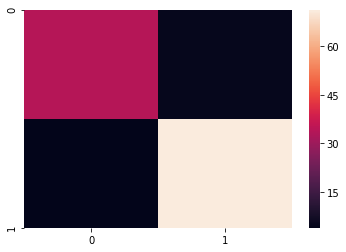

In [154]:
print("K Nearest Neighbors(K najbliższych sąsiadów)\n")
from sklearn.neighbors import KNeighborsClassifier
nearest_neighbour = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
nearest_neighbour.fit(train_data, train_target)
start = time.time()
model_rating(nearest_neighbour, test_target, test_data)
end = time.time()
time_all.append(end-start)
print("Czas wywołania: %s \n" % "{0:.5}s".format(end-start))

Decision tree Classification(las decyzyjny)

Macierz konfuzjii:
[[36  3]
 [13 62]]
Dokładność modelu: 0.85965
Walidacja krzyżowa: 92.17% std:(+/- 11.54%)
Prawdopodobieństwo predykcji dla losowego pacjenta nr 65.
złośliwy: 0.0, łagodny: 1.0
Czas wywołania: 0.087053s 



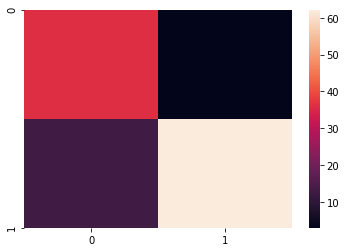

In [155]:
print("Decision tree Classification(las decyzyjny)\n")
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'gini', random_state = RANDOM_STATE_VALUE)
start = time.time()
decision_tree.fit(train_data, train_target)

model_rating(decision_tree, test_target, test_data)
end = time.time()
time_all.append(end-start)
print("Czas wywołania: %s \n" % "{0:.5}s".format(end-start))

C-Support Vector Classification

Macierz konfuzjii:
[[37  2]
 [ 4 71]]
Dokładność modelu: 0.94737
Walidacja krzyżowa: 93.91% std:(+/- 6.96%)
Prawdopodobieństwo predykcji dla losowego pacjenta nr 88.
złośliwy: 0.017494, łagodny: 0.98251
Czas wywołania: 7.2428s 



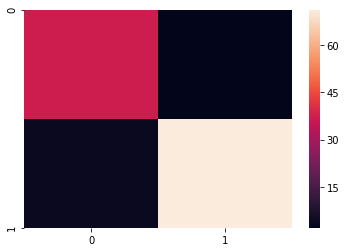

In [156]:
print("C-Support Vector Classification\n")
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = RANDOM_STATE_VALUE, probability=True)
start = time.time()
svc.fit(train_data, train_target)

model_rating(svc, test_target, test_data)
end = time.time()
time_all.append(end-start)
print("Czas wywołania: %s \n" % "{0:.5}s".format(end-start))

MLP Classification

Macierz konfuzjii:
[[32  7]
 [ 2 73]]
Dokładność modelu: 0.92105
Walidacja krzyżowa: 91.26% std:(+/- 14.50%)
Prawdopodobieństwo predykcji dla losowego pacjenta nr 109.
złośliwy: 0.0058037, łagodny: 0.9942
Czas wywołania: 0.75007s 



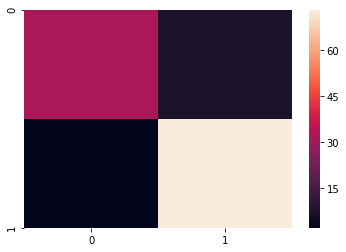

In [157]:
print("MLP Classification\n")
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(200, ),random_state=RANDOM_STATE_VALUE, max_iter=150, shuffle=True)
start = time.time()
mlp.fit(train_data, train_target)

model_rating(mlp, test_target, test_data)
end = time.time()
time_all.append(end-start)
print("Czas wywołania: %s \n" % "{0:.5}s".format(end-start))

In [158]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

X = data.iloc[:,0:30]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(10,'Score'))  #print 10 best features


            Feature          Score
23       worst area  112598.431564
3         mean area   53991.655924
13       area error    8758.504705
22  worst perimeter    3665.035416
2    mean perimeter    2011.102864
20     worst radius     491.689157
0       mean radius     266.104917
12  perimeter error     250.571896
21    worst texture     174.449400
1      mean texture      93.897508


In [159]:
X = [data['worst area'], data['mean area'], data['area error'], data['worst perimeter'], data['mean perimeter'],
     data['worst radius'], data['mean radius'], data['perimeter error'], data['worst texture'], data['mean texture']]
X = np.array(X)
X = np.transpose(X)


In [160]:
print(cancer.data.shape)
print(cancer.target.shape)
print(X)
from sklearn.model_selection import train_test_split, cross_val_score
train_data, test_data, \
train_target, test_target = \
train_test_split(X, cancer.target, test_size=0.2, random_state=RANDOM_STATE_VALUE)

(569, 30)
(569,)
[[2019.    1001.     153.4   ...    8.589   17.33    10.38 ]
 [1956.    1326.      74.08  ...    3.398   23.41    17.77 ]
 [1709.    1203.      94.03  ...    4.585   25.53    21.25 ]
 ...
 [1124.     858.1     48.55  ...    3.425   34.12    28.08 ]
 [1821.    1265.      86.22  ...    5.772   39.42    29.33 ]
 [ 268.6    181.      19.15  ...    2.548   30.37    24.54 ]]


Logistic Regression(logistyczna regresja)

Macierz konfuzjii:
[[36  3]
 [ 5 70]]
Dokładność modelu: 0.92982
Walidacja krzyżowa: 93.91% std:(+/- 8.87%)
Prawdopodobieństwo predykcji dla losowego pacjenta nr 30.
złośliwy: 0.0025781, łagodny: 0.99742
Czas wywołania: 0.11827s 



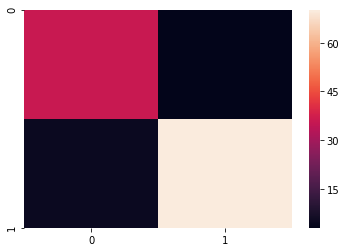

In [161]:
print("Logistic Regression(logistyczna regresja)\n")
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='liblinear',random_state=RANDOM_STATE_VALUE)
start = time.time()
logistic_regression.fit(train_data, train_target)

model_rating(logistic_regression, test_target, test_data)
end = time.time()
time_all.append(end-start)
print("Czas wywołania: %s \n" % "{0:.5}s".format(end-start))

K Nearest Neighbors(K najbliższych sąsiadów)

Macierz konfuzjii:
[[35  4]
 [ 3 72]]
Dokładność modelu: 0.93860
Walidacja krzyżowa: 87.75% std:(+/- 13.84%)
Prawdopodobieństwo predykcji dla losowego pacjenta nr 100.
złośliwy: 1.0, łagodny: 0.0
Czas wywołania: 0.10829s 



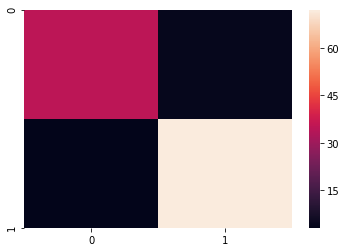

In [162]:
print("K Nearest Neighbors(K najbliższych sąsiadów)\n")
from sklearn.neighbors import KNeighborsClassifier
nearest_neighbour = KNeighborsClassifier(n_neighbors = 1 , metric = 'minkowski', p = 2)
nearest_neighbour.fit(train_data, train_target)
start = time.time()
model_rating(nearest_neighbour, test_target, test_data)
end = time.time()
time_all.append(end-start)
print("Czas wywołania: %s \n" % "{0:.5}s".format(end-start))

Decision tree Classification(las decyzyjny)

Macierz konfuzjii:
[[35  4]
 [ 5 70]]
Dokładność modelu: 0.92105
Walidacja krzyżowa: 90.43% std:(+/- 11.54%)
Prawdopodobieństwo predykcji dla losowego pacjenta nr 93.
złośliwy: 0.0, łagodny: 1.0
Czas wywołania: 0.076852s 



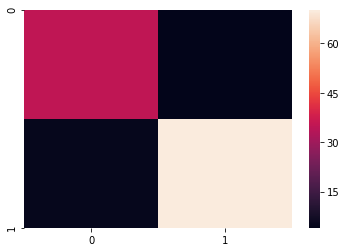

In [163]:
print("Decision tree Classification(las decyzyjny)\n")
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = RANDOM_STATE_VALUE)
start = time.time()
decision_tree.fit(train_data, train_target)

model_rating(decision_tree, test_target, test_data)
end = time.time()
time_all.append(end-start)
print("Czas wywołania: %s \n" % "{0:.5}s".format(end-start))

C-Support Vector Classification

Macierz konfuzjii:
[[37  2]
 [ 5 70]]
Dokładność modelu: 0.93860
Walidacja krzyżowa: 93.91% std:(+/- 6.96%)
Prawdopodobieństwo predykcji dla losowego pacjenta nr 57.
złośliwy: 0.015768, łagodny: 0.98423
Czas wywołania: 9.2814s 



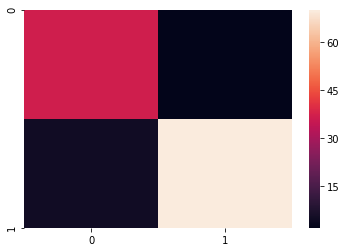

In [164]:
print("C-Support Vector Classification\n")
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = RANDOM_STATE_VALUE, probability=True)
start = time.time()
svc.fit(train_data, train_target)

model_rating(svc, test_target, test_data)
end = time.time()
time_all.append(end-start)
print("Czas wywołania: %s \n" % "{0:.5}s".format(end-start))

MLP Classification



C:\Users\mmigala\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Macierz konfuzjii:
[[35  4]
 [ 5 70]]
Dokładność modelu: 0.92105


C:\Users\mmigala\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mmigala\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Walidacja krzyżowa: 89.49% std:(+/- 8.81%)
Prawdopodobieństwo predykcji dla losowego pacjenta nr 24.
złośliwy: 1.0, łagodny: 1.5789e-07
Czas wywołania: 1.1204s 



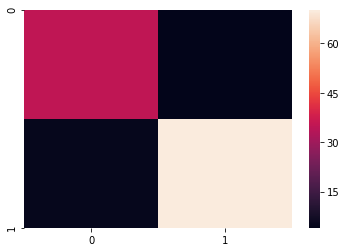

In [165]:
print("MLP Classification\n")
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, ),random_state=RANDOM_STATE_VALUE, max_iter=150, shuffle=True)
start = time.time()
mlp.fit(train_data, train_target)

model_rating(mlp, test_target, test_data)
end = time.time()
time_all.append(end-start)
print("Czas wywołania: %s \n" % "{0:.5}s".format(end-start))

In [166]:
models = ['LogisticRegresion', 'KNeighbors', 'DecisionTree', 'SVC', 'MLP',
         'LogisticRegresion selected', 'KNeighbors selected', 'DecisionTree selected',
          'SVC selected', 'MLP selected']
d = {'accuracy':acc_all, 'cross validation score':cvs_all, 'time':time_all}
table = pd.DataFrame(d, index=models)

In [167]:
table

,accuracy,cross validation score,time
LogisticRegresion,0.938596,0.947826,0.075356
KNeighbors,0.921053,0.895257,0.095818
DecisionTree,0.859649,0.921739,0.087053
SVC,0.947368,0.939130,7.242849
MLP,0.921053,0.912648,0.750071
LogisticRegresion selected,0.929825,0.939130,0.118275
KNeighbors selected,0.938596,0.877470,0.108294
DecisionTree selected,0.921053,0.904348,0.076852
SVC selected,0.938596,0.939130,9.281386
MLP selected,0.921053,0.894862,1.120366
